# Exploratory Data Analysis for League of Legends: Surrender at 10? Project

## Summary of Conclusions
- Wards have low correlations with every other feature in the dataset, which means I should be able to not include them into the model and there would be very little to no difference in accuracy.
- Not only that, but there seem to be errors present in those columns as well due to the super unlikely chance that many games would produce those numbers.
- I'm safe to remove either the kill difference or the death difference features as they have a significantly high correlation with each other (r = -1).
- The team that secures Dragon and the one for Rift Herald aren't correlated as the most popular choice for teams early in the game is to leave Herald alone whether it be due to risk or too much of a committment that early in the game.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("cleanedData.csv")

## Feature Descriptions:

| Feature | Description |
| :-------------- | :--------- |
| blueWins       | Whether or not the blue team eventually won the match (0 if not, 1 if so). |
| blue "Metric" Diff       | Difference in how much of that metric the blue team has compared to the red team. |
| drag/heraldTeam      | Which team has slain the Dragon/Rift Herald (1 if blue, -1 if red, 0 if neither). |
| fbTeam      | Which team got the first kill of the game (1 if blue, -1 if red, 0 if neither). |

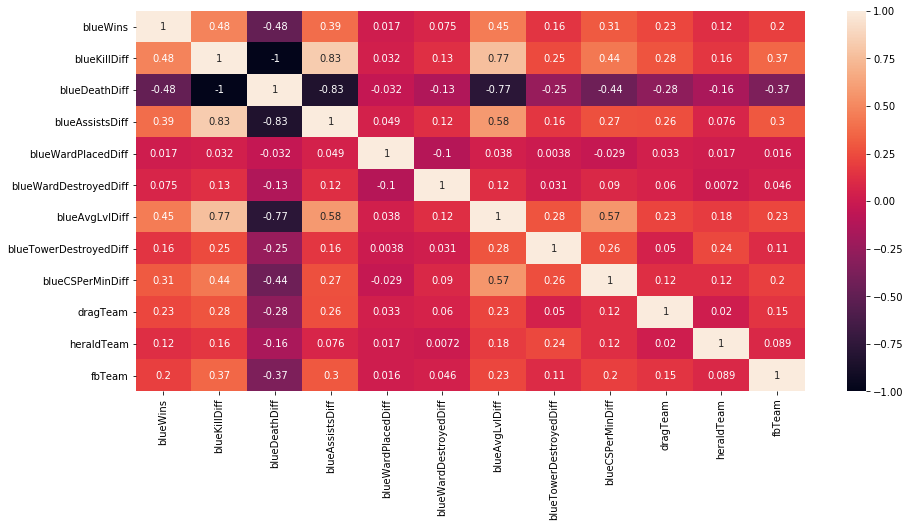

In [4]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

## A Few Observations:
- Early game wards have low, linear correlations with every other metric in the dataset. Perhaps because the first 10 minutes are usually spent in the laning phase, where wards really only find themselves alerting each lane when the jungler is near.
- Kills and Deaths have a correlation of -1, so I'm curious to see how many games had an execution (when a player dies but not from an enemy player) involved.
- There is a low correlation between the team that slays the first Dragon and the team for Rift Herald. 

### Early Game Wards:
Wards are described as one of the most important aspects of the game, so I was shocked to find that they had such a low correlation score to every other aspect of the dataset.

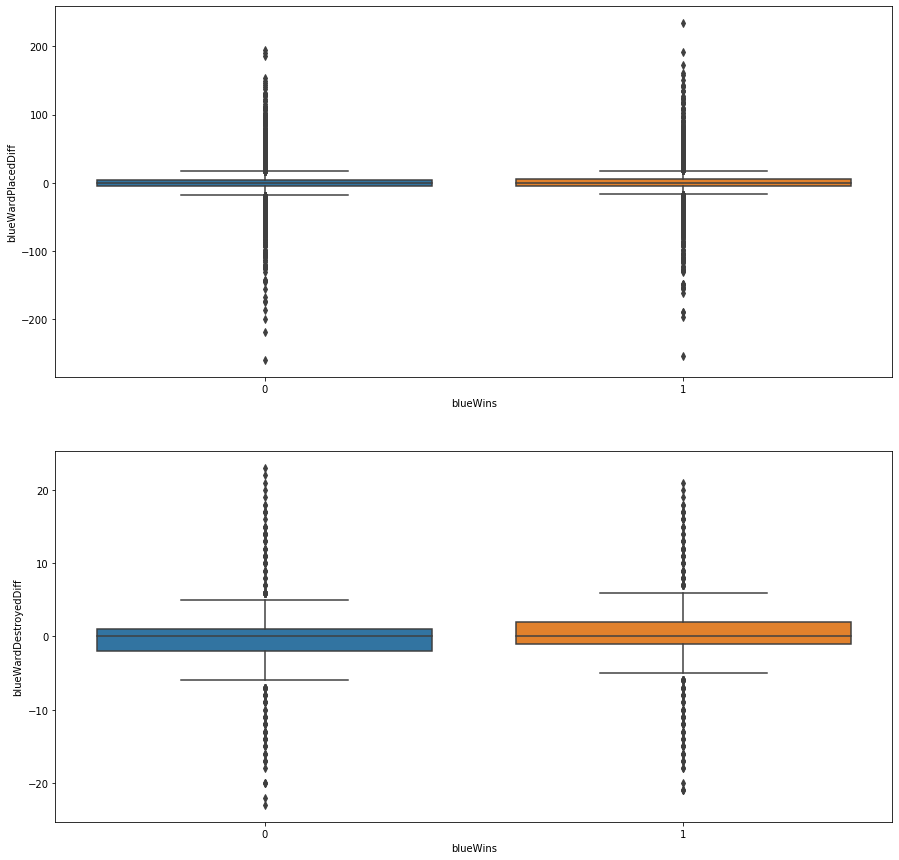

In [5]:
fig, axs = plt.subplots(nrows=2, figsize=(15,15))
sns.boxplot(df["blueWins"], df["blueWardPlacedDiff"],ax=axs[0])
sns.boxplot(df["blueWins"], df["blueWardDestroyedDiff"],ax=axs[1])

It doesn't seem like there isn't much difference between the difference in wards placed/destroyed and whether or not the blue team wins. The boxplots show similar distributions to each other (and having close to the same quartile values). Because of this fact, I should be able to remove these features from the model.

Something else I never noticed before is that the numbers for number of wards placed seem very off to begin with. It doesn't seem reasonable for the teams to be able to place hundreds of wards by the 10 minute mark. That would mean 20 wards a minute in some of the games listed which would either be very gold inefficient (especially at this high level of play), or it signifies an error in the data (perhaps the numbers are achieved from the entire game rather than the 10 minute mark). After checking the original spreadsheet, there are values listed in the hundreds so the latter hypothesis might turn out to be true.

[Another exploration about ward placements in games](https://mobalytics.gg/blog/detailed-analysis-warding-league-legends/) show that the numbers generated in the games are super unlikely. They show that the number of wards placed per entire game are usually much lower than the results I'm getting at the 10 minute mark (the exploration is from 2016 as well, when there were slightly more options for wards that could be placed).

### K/D Ratio:
I wanted to see if there were any games where the amount of kills and deaths differed due to executions. Sometimes, an execution can happen due to minions accidentally killing a player or a player intentionally dying in a way where an enemy can't get credit for it. At such a higher level of play such as these games, I would expect more executions to happen of the latter type. However, the heatmap noted that the correlation between Kills and Deaths are -1, so there might not be any instances of executions in the data.

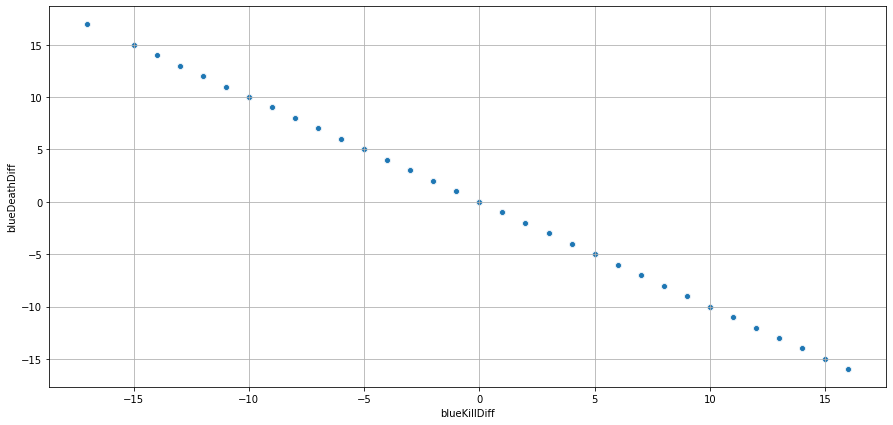

In [6]:
plt.figure(figsize=(15,7))
plt.grid()
sns.scatterplot(df["blueKillDiff"], df["blueDeathDiff"])

From the graph, it seems like there never was a game where the amount of kills and deaths differed. Since this is the case, I can safely remove either one of these features from the dataset when I create my model.

### Dragons and Rift Heralds:
The correlation plot showed low correlation between the team that obtains Dragon first and the team that obtains the Rift Herald. Because of this fact, I am curious to know which combination of teams for Dragon and Herald are the most popular.

In [8]:
df.groupby(['dragTeam', 'heraldTeam']).size()

dragTeam  heraldTeam
-1        -1             730
           0            2542
           1             809
 0        -1             308
           0            1576
           1             338
 1        -1             543
           0            2323
           1             710
dtype: int64

It seams that no matter what team gets dragon first, the most popular result for Rift Herald is for it to not be taken by the 10 minute mark. The most popular combinations of the two variables are one team securing Dragon and no team securing Herald. This could be explained due to how it takes more resources from a team to defeat the Herald, especially this early into the game. It also would be fairly easy for the other team to stop/steal the objective from them making the Herald too much of a risk to take at this stage in the game.